In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
def imshow(name, img):
    plt.figure(figsize=([20, 20]))
    plt.subplot(121),plt.imshow(img, cmap = 'gray')
    plt.title(name), plt.xticks([]), plt.yticks([])
def imshow2(name1, img1, name2, img2):
    plt.figure(figsize=([20, 20]))
    plt.subplot(121),plt.imshow(img1, cmap = 'gray')
    plt.title(name1), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img2, cmap = 'gray')
    plt.title(name2), plt.xticks([]), plt.yticks([])
    plt.show()


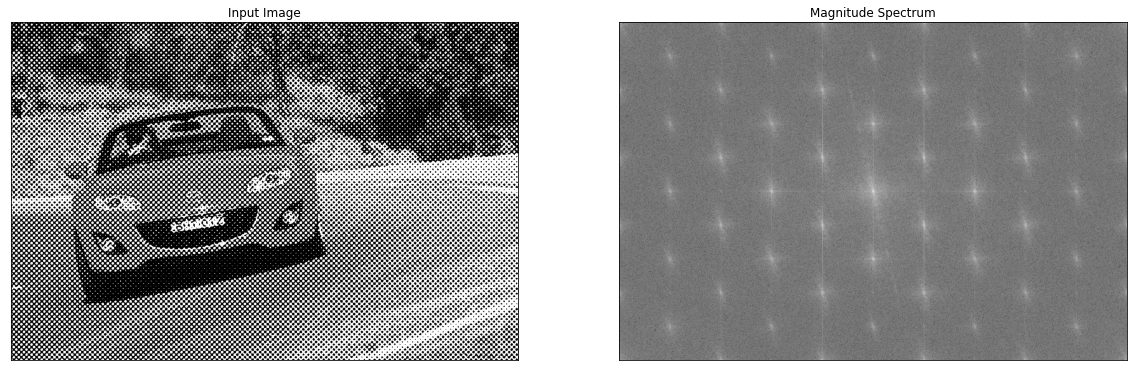

In [2]:
img = cv2.imread('./img/week12.png',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
imshow2('Input Image', img, 'Magnitude Spectrum', magnitude_spectrum)

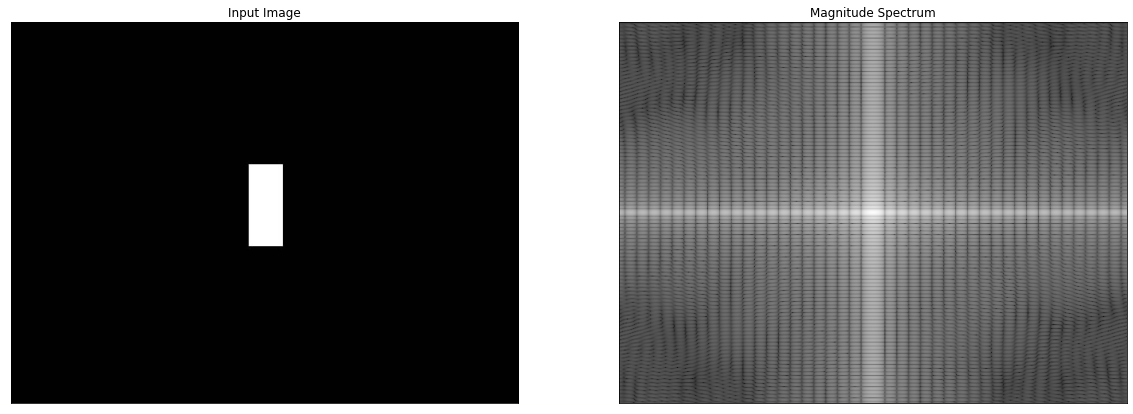

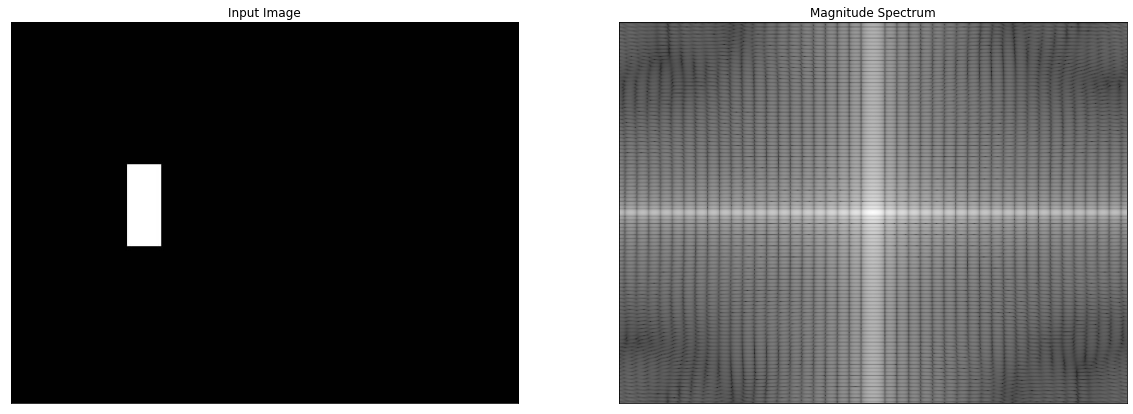

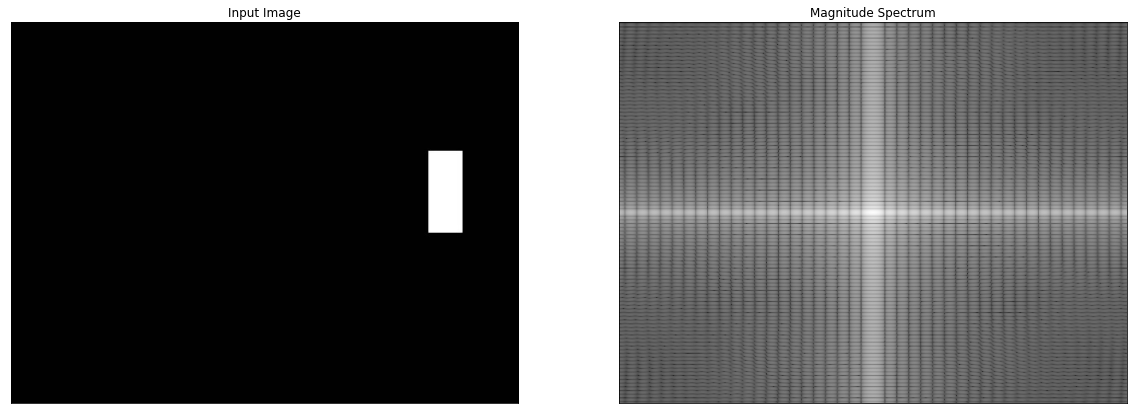

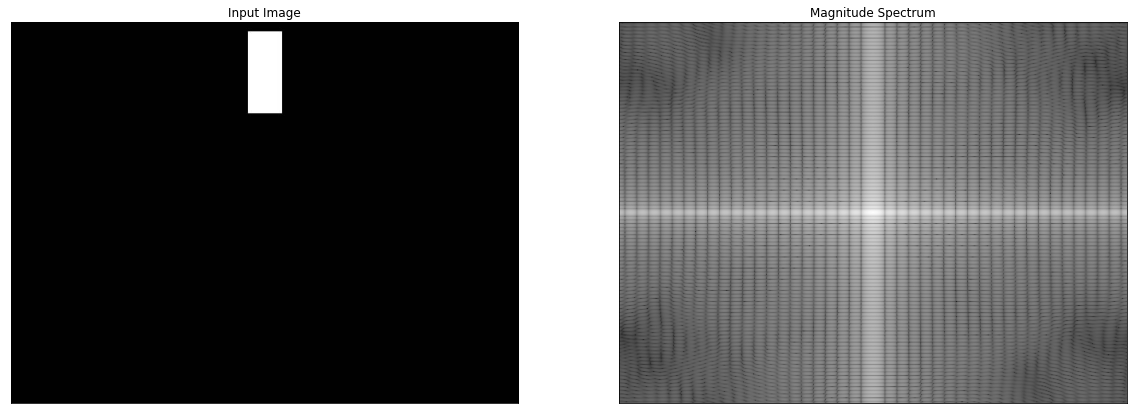

In [3]:
paths = ['./img/week12a.jpg', './img/week12b.jpg', './img/week12c.jpg', './img/week12d.jpg']
for path in paths:
    img = cv2.imread(path,0)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    imshow2("Input Image", img, 'Magnitude Spectrum', magnitude_spectrum)

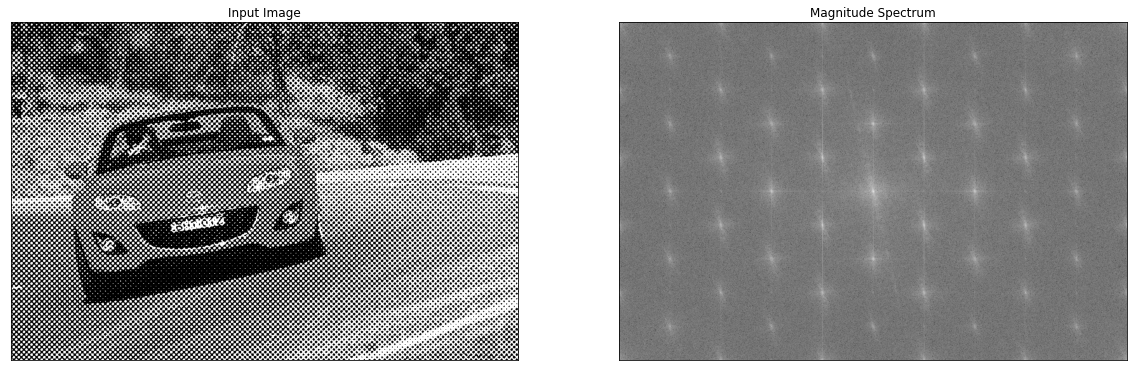

In [17]:
img = cv2.imread('./img/week12.png',0)
# Transform the image to frequency domain
f = np.fft.fft2(img)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(1+np.abs(fshift))
imshow2("Input Image", img, 'Magnitude Spectrum', magnitude_spectrum)

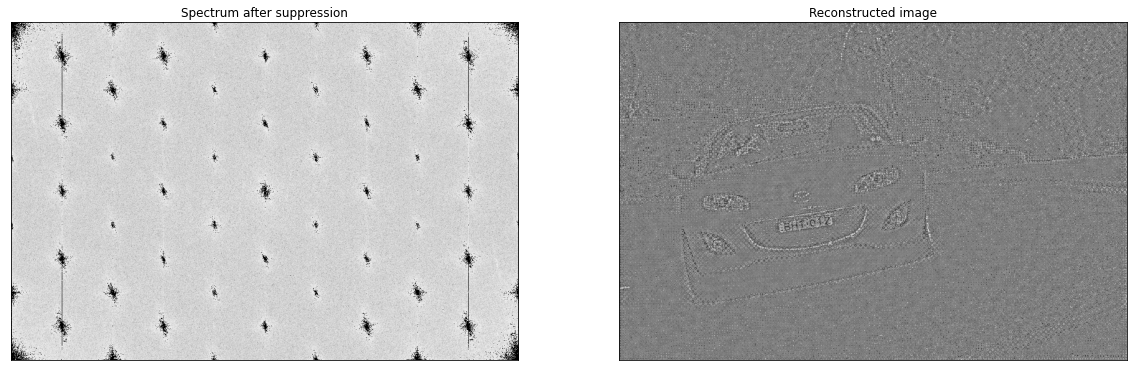

True

In [18]:
F = f
F_magnitude = np.fft.fftshift(np.abs(F))
c = (int(F_magnitude.shape[1]/2), int(F_magnitude.shape[0]/2))
R = 25
F_magnitude[c[0]-R:c[0]+R,c[1]-R:c[1]+R]=0 # Set block around center of spectrum to zero
# Find all peaks higher than the 98th percentile
peaks = F_magnitude < np.percentile(F_magnitude, 98)

# Shift the peaks back to align with the original spectrum
peaks = np.fft.ifftshift(peaks)

# Make a copy of the original (complex) spectrum
F_dim = F.copy()

# Set those peak coefficients to zero
F_dim = F_dim * peaks.astype(int)

# Do the inverse Fourier transform to get back to an image.
# Since we started with a real image, we only look at the real part of
# the output.
image_filtered = np.real(np.fft.ifft2(F_dim))

imshow2('Spectrum after suppression', np.log10(1 + np.abs(F_dim)), 'Reconstructed image', image_filtered)
cv2.imwrite("./img/week12_output.jpg", image_filtered)